In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("D:\Documents\COMP-4312-Cloud-Computing\COMP4312finalProject\data\housing.csv")

In [10]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
print("Length of training data: %d"%(len(dataset)))

Length of training data: 20640


In [12]:
print(dataset.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [3]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


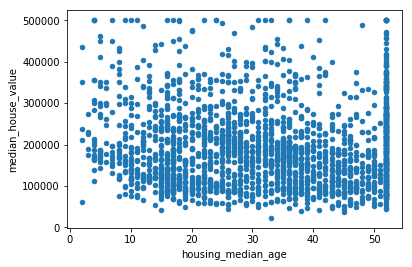

In [11]:
dataset.head(2000).plot.scatter(x='housing_median_age', y='median_house_value')

In [13]:
from sklearn.model_selection import train_test_split
traintest = dataset[["longitude","latitude", "housing_median_age","total_rooms","total_bedrooms", "population", "households", "median_income", "median_house_value"]].sample(frac=1, random_state=1).reset_index(drop=True)
train,test = train_test_split(traintest, test_size=0.3)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [15]:
train.to_csv("D:\Documents\COMP-4312-Cloud-Computing\COMP4312finalProject\data\\train.csv", index=False)
test.to_csv("D:\Documents\COMP-4312-Cloud-Computing\COMP4312finalProject\data\\test.csv", index=False)

In [16]:
print("Length of training data: %d"%(len(train)))

Length of training data: 14448


In [17]:
print("Length of testing data: %d"%(len(test)))

Length of testing data: 6192
